In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
import seaborn as sns
import spacy
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk import word_tokenize
from nltk import WordNetLemmatizer, SnowballStemmer
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
nlp = spacy.load('en_core_web_sm')
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\blayn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\blayn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\blayn\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [13]:
#Let's open the data and take a look
df = pd.read_csv(r'S:\Data\amazon_reviews.csv')
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [15]:
#Lowercase the column headers and take a look at how many null values we are working with
df.columns = map(str.lower, df.columns)
df.columns = df.columns.str.replace(' ','_').str.replace('-','_').str.replace('.','_')
df.columns = df.columns.str.strip('?!.&^*()$#@')
df.isna().sum()

id                          0
name                     6760
asins                       2
brand                       0
categories                  0
keys                        0
manufacturer                0
reviews_date               39
reviews_dateadded       10621
reviews_dateseen            0
reviews_didpurchase     34659
reviews_dorecommend       594
reviews_id              34659
reviews_numhelpful        529
reviews_rating             33
reviews_sourceurls          0
reviews_text                1
reviews_title               5
reviews_usercity        34660
reviews_userprovince    34660
reviews_username            2
dtype: int64

In [16]:
df.nunique()

id                         42
name                       48
asins                      41
brand                       6
categories                 41
keys                       42
manufacturer                2
reviews_date             1078
reviews_dateadded        1941
reviews_dateseen         3911
reviews_didpurchase         1
reviews_dorecommend         2
reviews_id                  1
reviews_numhelpful         97
reviews_rating              5
reviews_sourceurls      11929
reviews_text            34659
reviews_title           19767
reviews_usercity            0
reviews_userprovince        0
reviews_username        26789
dtype: int64

In [17]:
#Since we are only concerned with looking at sentiment, we can extract only the rating and and text from the review
df = df[['reviews_rating','reviews_text']]
df.dropna()
df

,reviews_rating,reviews_text
0,5.0,This product so far has not disappointed. My c...
1,5.0,great for beginner or experienced person. Boug...
2,5.0,Inexpensive tablet for him to use and learn on...
3,4.0,I've had my Fire HD 8 two weeks now and I love...
4,5.0,I bought this for my grand daughter when she c...
...,...,...
34655,3.0,This is not appreciably faster than any other ...
34656,1.0,Amazon should include this charger with the Ki...
34657,1.0,Love my Kindle Fire but I am really disappoint...
34658,1.0,I was surprised to find it did not come with a...


<AxesSubplot:xlabel='reviews_rating', ylabel='count'>

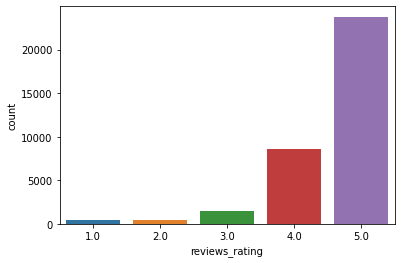

In [18]:
#Taking a look at the target column distributions.
sns.countplot(x=df['reviews_rating'])

We'll need to use Synthetic Minority Oversampling Technique (SMOTE) to balance these values out for better prediction later. Next, we are going to take a look at tokenization/stemming of our reviews, and determine which of three methods we want to use in order to build out our tf-idf feature set.

In [19]:
#Let's tokenize our words before running a test of lemmatization/stemming on them. We will make another column 
#with our final lemmas later.
df['tokenized_reviews'] = df['reviews_text'].astype(str).apply(word_tokenize)
df

,reviews_rating,reviews_text,tokenized_reviews
0,5.0,This product so far has not disappointed. My c...,"[This, product, so, far, has, not, disappointe..."
1,5.0,great for beginner or experienced person. Boug...,"[great, for, beginner, or, experienced, person..."
2,5.0,Inexpensive tablet for him to use and learn on...,"[Inexpensive, tablet, for, him, to, use, and, ..."
3,4.0,I've had my Fire HD 8 two weeks now and I love...,"[I, 've, had, my, Fire, HD, 8, two, weeks, now..."
4,5.0,I bought this for my grand daughter when she c...,"[I, bought, this, for, my, grand, daughter, wh..."
...,...,...,...
34655,3.0,This is not appreciably faster than any other ...,"[This, is, not, appreciably, faster, than, any..."
34656,1.0,Amazon should include this charger with the Ki...,"[Amazon, should, include, this, charger, with,..."
34657,1.0,Love my Kindle Fire but I am really disappoint...,"[Love, my, Kindle, Fire, but, I, am, really, d..."
34658,1.0,I was surprised to find it did not come with a...,"[I, was, surprised, to, find, it, did, not, co..."


In [20]:
#Now let's pit stemming, lemmatization with the nltk package, and lemmatization with the spacy package against 
#each other to see which one is the best use case
sp = spacy.load('en_core_web_sm')
lemmatizer = WordNetLemmatizer()
stemmer = SnowballStemmer("english")

words = df['tokenized_reviews'][1]
for word in words:
    print(f'Orginal Word : {word}')
    print(f'Stemmer with nltk : {stemmer.stem(word)}')
    print(f'Lemmatization with nltk : {lemmatizer.lemmatize(word)}')
    
    sp_word = sp(word)
    print(f'Lemmatization with spacy : {sp_word[0].lemma_}')

Orginal Word : great
Stemmer with nltk : great
Lemmatization with nltk : great
Lemmatization with spacy : great
Orginal Word : for
Stemmer with nltk : for
Lemmatization with nltk : for
Lemmatization with spacy : for
Orginal Word : beginner
Stemmer with nltk : beginn
Lemmatization with nltk : beginner
Lemmatization with spacy : beginner
Orginal Word : or
Stemmer with nltk : or
Lemmatization with nltk : or
Lemmatization with spacy : or
Orginal Word : experienced
Stemmer with nltk : experienc
Lemmatization with nltk : experienced
Lemmatization with spacy : experience
Orginal Word : person
Stemmer with nltk : person
Lemmatization with nltk : person
Lemmatization with spacy : person
Orginal Word : .
Stemmer with nltk : .
Lemmatization with nltk : .
Lemmatization with spacy : .
Orginal Word : Bought
Stemmer with nltk : bought
Lemmatization with nltk : Bought
Lemmatization with spacy : buy
Orginal Word : as
Stemmer with nltk : as
Lemmatization with nltk : a
Lemmatization with spacy : as
Orgin

In [21]:
##We can see that the stemmer prematurely cuts off some words, and the lemmas are mostly the same.
#the exception being that spacy seems to form more consistency among finding roots of words. Lets run with spacy for this go around.
df['lem_tokens'] = df['reviews_text'].apply(lambda x: ' '.join([y.lemma_ for y in nlp(str(x))]))
df

,reviews_rating,reviews_text,tokenized_reviews,lem_tokens
0,5.0,This product so far has not disappointed. My c...,"[This, product, so, far, has, not, disappointe...",this product so far have not disappoint . my c...
1,5.0,great for beginner or experienced person. Boug...,"[great, for, beginner, or, experienced, person...",great for beginner or experienced person . buy...
2,5.0,Inexpensive tablet for him to use and learn on...,"[Inexpensive, tablet, for, him, to, use, and, ...",inexpensive tablet for he to use and learn on ...
3,4.0,I've had my Fire HD 8 two weeks now and I love...,"[I, 've, had, my, Fire, HD, 8, two, weeks, now...",I 've have my Fire HD 8 two week now and I lov...
4,5.0,I bought this for my grand daughter when she c...,"[I, bought, this, for, my, grand, daughter, wh...",I buy this for my grand daughter when she come...
...,...,...,...,...
34655,3.0,This is not appreciably faster than any other ...,"[This, is, not, appreciably, faster, than, any...",this be not appreciably fast than any other 1....
34656,1.0,Amazon should include this charger with the Ki...,"[Amazon, should, include, this, charger, with,...",Amazon should include this charger with the Ki...
34657,1.0,Love my Kindle Fire but I am really disappoint...,"[Love, my, Kindle, Fire, but, I, am, really, d...",love my Kindle Fire but I be really disappoint...
34658,1.0,I was surprised to find it did not come with a...,"[I, was, surprised, to, find, it, did, not, co...",I be surprised to find it do not come with any...


In [159]:
#Now for Vectorization!
corpus = df['lem_tokens'].values
 
# Creating the vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
 
# Converting the text to numeric data
X = vectorizer.fit_transform(corpus)
 
# Preparing Data frame For machine learning
# Priority column acts as a target variable and other columns as predictors
data_for_ml=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
data_for_ml['reviews_rating']=df['reviews_rating']
print(data_for_ml.shape)
print(data_for_ml['reviews_rating'].unique())
data_for_ml.head()

(34660, 11171)
[ 5.  4.  2.  1.  3. nan]


,00,000,000s,01,04,05,06,0ff,0ghz,0ne,...,zip,zipper,zippy,zombies,zone,zoo,zoom,zooming,zwave,reviews_rating
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [160]:
#Target Data Normalization with StandardScaler
#Extract features list, get rid of our target variable before scaling, and designate the features to be scaled.
features = data_for_ml.columns.to_list()
print(features[-5:]) #Target column is at the end
features.remove('reviews_rating') #Removing target column for scaling designation
print(features[-5:]) #Check removal

#Scaling the Data
sc = StandardScaler().fit(data_for_ml[features])
data_for_ml[features] = sc.transform(data_for_ml[features])

#Ensure no NaN values
data_for_ml= data_for_ml.dropna()

# Subsetting data for X and y
X=data_for_ml[features].values
y=data_for_ml['reviews_rating'].values

data_for_ml.head()

['zoo', 'zoom', 'zooming', 'zwave', 'reviews_rating']
['zone', 'zoo', 'zoom', 'zooming', 'zwave']


,00,000,000s,01,04,05,06,0ff,0ghz,0ne,...,zip,zipper,zippy,zombies,zone,zoo,zoom,zooming,zwave,reviews_rating
0,-0.042494,-0.01317,-0.005371,-0.00759,-0.005371,-0.005371,-0.005371,-0.005371,-0.005371,-0.005371,...,-0.009568,-0.005371,-0.008898,-0.005371,-0.013477,-0.00663,-0.014066,-0.005371,-0.007585,5.0
1,-0.042494,-0.01317,-0.005371,-0.00759,-0.005371,-0.005371,-0.005371,-0.005371,-0.005371,-0.005371,...,-0.009568,-0.005371,-0.008898,-0.005371,-0.013477,-0.00663,-0.014066,-0.005371,-0.007585,5.0
2,-0.042494,-0.01317,-0.005371,-0.00759,-0.005371,-0.005371,-0.005371,-0.005371,-0.005371,-0.005371,...,-0.009568,-0.005371,-0.008898,-0.005371,-0.013477,-0.00663,-0.014066,-0.005371,-0.007585,5.0
3,-0.042494,-0.01317,-0.005371,-0.00759,-0.005371,-0.005371,-0.005371,-0.005371,-0.005371,-0.005371,...,-0.009568,-0.005371,-0.008898,-0.005371,-0.013477,-0.00663,-0.014066,-0.005371,-0.007585,4.0
4,-0.042494,-0.01317,-0.005371,-0.00759,-0.005371,-0.005371,-0.005371,-0.005371,-0.005371,-0.005371,...,-0.009568,-0.005371,-0.008898,-0.005371,-0.013477,-0.00663,-0.014066,-0.005371,-0.007585,5.0


So, we have over 11,000 columns in our new dataset. This will likely cause poor performance with most algorithms that we run on it, and therefore we need to conduct some Principle Component Analysis (PCA) to determine which features are the most beneficial for our machine learning algorithms, and drop the rest that don't add any additional predictive ability to the models. This will also help reduce the noise that is being injected from words that aren't very beneficial and aren't included in our stopwords. 

[ 0.41  0.59  0.74 ... 99.79 99.79 99.79]


Text(0, 0.5, '% Variance explained')

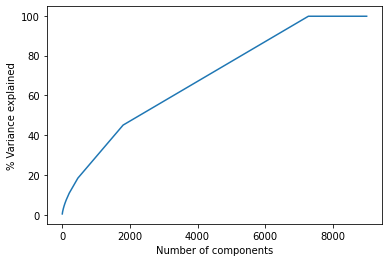

In [164]:
#Running an initial Priciple Compenent Analysis

# Trying maximum 9000 components.
# You need to choose any number which is less than the total number of columns in the original data
# I iterated through this a couple of time with less components to check where the most saturation is met
NumComponents=9000
pca = PCA(n_components=NumComponents)
 
# Fitting the data
pca_fit=pca.fit(X)
 
# Calculating the principal components
reduced_X = pca_fit.transform(X)
 
#Cumulative Variance explained by each component
var_explained_cumulative=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var_explained_cumulative)
 
# Look for the elbow in the plot
plt.plot( range(1,len(var_explained_cumulative)+1), var_explained_cumulative )
plt.xlabel('Number of components')
plt.ylabel('% Variance explained')

In [89]:
#We can see that the curve levels off around ~99%. Let extract the number of features right at the elbow in the chart above.
# Creating 7000 Principal components based on the above curve
NumComponents=7000
pca = PCA(n_components=NumComponents)
 
# Fitting the data
pca_fit=pca.fit(X)
 
# Calculating the principal components
reduced_X = pca_fit.transform(X)

In [26]:
# Equating reduced_X to X to let the other code run without changing everything
X=reduced_X
# Generating Predictor names
Predictors=pd.Series(['PC']*NumComponents).str.cat(pd.Series(range(1,NumComponents+1)).apply(str)).values
Predictors

array(['PC1', 'PC2', 'PC3', ..., 'PC6998', 'PC6999', 'PC7000'],
      dtype=object)

We're going to be using an Net Promoter Scale (NPS), so we'll need to convert the target's 1-3 values into detractors, 4's into neutrals,
and 5's into promoters. This will narrow our scope for prediction but also produce a more meaningful classficiation in terms of the data
telling us whether the comment is essentially promoting, detracting, or is neutral in sentiment on the product.

In [27]:
#Converting our target column values
nps_values = {1.0:'detractor',2.0:'detractor',3.0:'detractor',4.0:'neutral',5.0:'promotor'}
data_for_ml['nps_category'] = data_for_ml['reviews_rating'].map(nps_values)
data_for_ml = data_for_ml.dropna()
target = 'nps_category'
data_for_ml

,00,000,000s,01,04,05,06,0ff,0ghz,0ne,...,zipper,zippy,zombies,zone,zoo,zoom,zooming,zwave,reviews_rating,nps_category
0,-0.042494,-0.01317,-0.005371,-0.00759,-0.005371,-0.005371,-0.005371,-0.005371,-0.005371,-0.005371,...,-0.005371,-0.008898,-0.005371,-0.013477,-0.00663,-0.014066,-0.005371,-0.007585,5.0,promotor
1,-0.042494,-0.01317,-0.005371,-0.00759,-0.005371,-0.005371,-0.005371,-0.005371,-0.005371,-0.005371,...,-0.005371,-0.008898,-0.005371,-0.013477,-0.00663,-0.014066,-0.005371,-0.007585,5.0,promotor
2,-0.042494,-0.01317,-0.005371,-0.00759,-0.005371,-0.005371,-0.005371,-0.005371,-0.005371,-0.005371,...,-0.005371,-0.008898,-0.005371,-0.013477,-0.00663,-0.014066,-0.005371,-0.007585,5.0,promotor
3,-0.042494,-0.01317,-0.005371,-0.00759,-0.005371,-0.005371,-0.005371,-0.005371,-0.005371,-0.005371,...,-0.005371,-0.008898,-0.005371,-0.013477,-0.00663,-0.014066,-0.005371,-0.007585,4.0,neutral
4,-0.042494,-0.01317,-0.005371,-0.00759,-0.005371,-0.005371,-0.005371,-0.005371,-0.005371,-0.005371,...,-0.005371,-0.008898,-0.005371,-0.013477,-0.00663,-0.014066,-0.005371,-0.007585,5.0,promotor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34655,-0.042494,-0.01317,-0.005371,-0.00759,-0.005371,-0.005371,-0.005371,-0.005371,-0.005371,-0.005371,...,-0.005371,-0.008898,-0.005371,-0.013477,-0.00663,-0.014066,-0.005371,-0.007585,3.0,detractor
34656,-0.042494,-0.01317,-0.005371,-0.00759,-0.005371,-0.005371,-0.005371,-0.005371,-0.005371,-0.005371,...,-0.005371,-0.008898,-0.005371,-0.013477,-0.00663,-0.014066,-0.005371,-0.007585,1.0,detractor
34657,-0.042494,-0.01317,-0.005371,-0.00759,-0.005371,-0.005371,-0.005371,-0.005371,-0.005371,-0.005371,...,-0.005371,-0.008898,-0.005371,-0.013477,-0.00663,-0.014066,-0.005371,-0.007585,1.0,detractor
34658,-0.042494,-0.01317,-0.005371,-0.00759,-0.005371,-0.005371,-0.005371,-0.005371,-0.005371,-0.005371,...,-0.005371,-0.008898,-0.005371,-0.013477,-0.00663,-0.014066,-0.005371,-0.007585,1.0,detractor


<AxesSubplot:xlabel='nps_category', ylabel='count'>

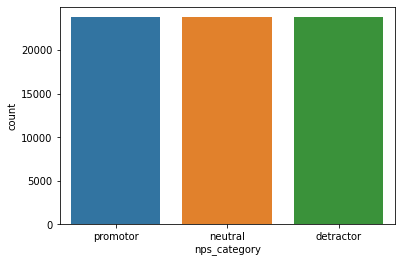

In [28]:
#Balance Data Using SMOTE. We mentioned earlier we'd need to normalize our dataset using SMOTE, now is the time to do so.

#We got X from our PCA step, but let's reset our y variable to our new consolidated NPS categories
y=data_for_ml[target]

#SMOTE
s = SMOTE()
X, y = s.fit_resample(X, y)
sns.countplot(x=y)

In [29]:
#Splitting the dataset into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Accuracy with Logistic Regression:  0.73
              precision    recall  f1-score   support

   detractor       0.81      0.92      0.86      4889
     neutral       0.67      0.67      0.67      4715
    promotor       0.69      0.59      0.63      4661

    accuracy                           0.73     14265
   macro avg       0.72      0.72      0.72     14265
weighted avg       0.72      0.73      0.72     14265



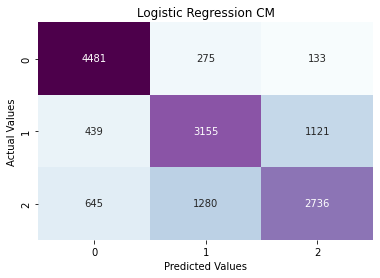

array([[4481,  275,  133],
       [ 439, 3155, 1121],
       [ 645, 1280, 2736]], dtype=int64)

In [31]:
#Set Confusion Matrix function for plotting, then let's run a simple logistic regression on the set and get some results.

def plot_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm


#Logistic Regression
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
train_pred = lr.predict(X_train)
print('Accuracy with Logistic Regression: ',round(accuracy_score(y_test,y_pred),2))
plot_confusion_matrix(y_test, y_pred, 'Logistic Regression CM')

Random Forest Classifier Accuracy Score:  0.89
              precision    recall  f1-score   support

   detractor       0.97      0.98      0.98      4889
     neutral       0.87      0.81      0.84      4715
    promotor       0.82      0.86      0.84      4661

    accuracy                           0.89     14265
   macro avg       0.89      0.89      0.89     14265
weighted avg       0.89      0.89      0.89     14265



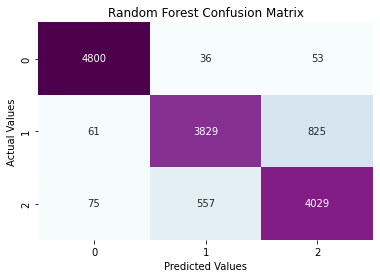

In [32]:
#Random Forest Classifier Modeling
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(bootstrap= True,
                           n_estimators= 800,
                           random_state=0,
                           n_jobs=16) #CAUTION: I am running a 20 thread processor. Adjust n_jobs as necessesary for parallel processing, but watch core temps if on your local machine.
rfc.fit(X_train, y_train)
y_pred_rfc=rfc.predict(X_test)
print('Random Forest Classifier Accuracy Score: ',round(accuracy_score(y_test,y_pred_rfc),2))
cm_rfc=plot_confusion_matrix(y_test, y_pred_rfc, 'Random Forest Confusion Matrix')

KNN Accuracy Score:  0.83
              precision    recall  f1-score   support

   detractor       0.88      1.00      0.93      4889
     neutral       0.75      0.92      0.83      4715
    promotor       0.90      0.57      0.70      4661

    accuracy                           0.83     14265
   macro avg       0.84      0.83      0.82     14265
weighted avg       0.84      0.83      0.82     14265



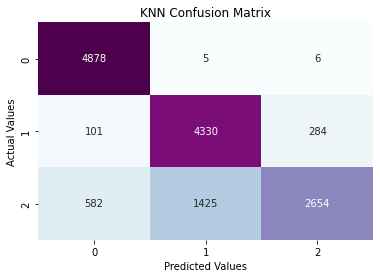

In [33]:
#KNN Modeling
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p=2,n_jobs=16) #CAUTION: I am running a 20 thread processor. Adjust n_jobs as necessesary for parallel processing, but watch core temps if on your local machine.
knn_classifier.fit(X_train, y_train)
y_pred_knn=knn_classifier.predict(X_test)
print('KNN Accuracy Score: ',round(accuracy_score(y_test,y_pred_knn),2))
cm_knn=plot_confusion_matrix(y_test, y_pred_knn, 'KNN Confusion Matrix')

As we can see the Random Forest Classifier performs the best with this dataset. Looking at the confusion matrix, we can see that all the models appear to get the neutrals (4's) and promotors (5's) a little confused. This makes sense in context as reviews comprising of 4's and 5's likely use similar language. Overall, I am quite impressed with how the modeling turned out in terms of accuracy and precision. 